In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
!wget --no-check-certificate \
    https://github.com/imciflam/covid-detection/blob/main/train.zip?raw=true \
    -O /tmp/train.zip

--2021-12-06 17:35:47--  https://github.com/imciflam/covid-detection/blob/main/train.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/imciflam/covid-detection/raw/main/train.zip [following]
--2021-12-06 17:35:47--  https://github.com/imciflam/covid-detection/raw/main/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/imciflam/covid-detection/main/train.zip [following]
--2021-12-06 17:35:47--  https://raw.githubusercontent.com/imciflam/covid-detection/main/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

In [4]:
!wget --no-check-certificate \
    https://github.com/imciflam/covid-detection/blob/main/val.zip?raw=true \
    -O /tmp/val.zip

--2021-12-06 17:35:49--  https://github.com/imciflam/covid-detection/blob/main/val.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/imciflam/covid-detection/raw/main/val.zip [following]
--2021-12-06 17:35:49--  https://github.com/imciflam/covid-detection/raw/main/val.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/imciflam/covid-detection/main/val.zip [following]
--2021-12-06 17:35:49--  https://raw.githubusercontent.com/imciflam/covid-detection/main/val.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [5]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/val.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
# content/drive/My Drive/covid => tmp
noncov_val = '/tmp/val/noncov/'
noncov_train = '/tmp/train/noncov'
cov_val = '/tmp/val/cov/'
cov_train = '/tmp/train/cov'


#### Data split

In [7]:
!ls "/content/drive/My Drive/covid" 

ls: cannot access '/content/drive/My Drive/covid': No such file or directory


In [8]:
# base_dir = "/content/drive/My Drive/covid"
# import glob
# import os

# list_of_files = glob.glob('/content/drive/My Drive/covid/cov/*.jpg') 
# latest_file = max(list_of_files, key=os.path.getctime)
# print(list_of_files)
# print(latest_file)

# os.rename(os.path.join(base_dir, 'cov'), "path/to/new/destination/for/file.foo")
# os.rename(os.path.join(base_dir, 'noncov'), "path/to/new/destination/for/file.foo")
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')


splitting the dataset

In [9]:
import shutil
import os

def data_split():

  files = os.listdir(cov_train)
  for f in files:
      if (f.startswith("covid(5)")):
          shutil.move(cov_train+"/"+f, ov_val)
      else:
          shutil.move(source+f, dest2)


In [10]:
# data_split()

#### Data visualization

In [11]:
def get_info_on_splitted_data(): 
  
  files_val_noncov = os.listdir(noncov_val)
  files_train_noncov = os.listdir(noncov_train)
  files_val_cov = os.listdir(cov_val)
  files_train_cov = os.listdir(cov_train)
  print("noncov train: "+str(len(files_train_noncov)))
  print("noncov val: "+str(len(files_val_noncov)))
  print("cov train: "+str(len(files_train_cov)))
  print("cov val: "+str(len(files_val_cov)))
  print(len(files_train_noncov)/(len(files_train_noncov)+len(files_val_noncov)))
  print(len(files_train_cov)/(len(files_train_cov)+len(files_val_cov)))

In [12]:
get_info_on_splitted_data()

noncov train: 2379
noncov val: 311
cov train: 1500
cov val: 234
0.8843866171003717
0.8650519031141869


show examples

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_example_pics():
  nrows = 4
  ncols = 4
  pic_index = 0

  fig = plt.figure()
  fig.set_size_inches(ncols * 4, nrows * 4)

  pic_index += 8
  next_noncov_pic = [os.path.join(noncov_train, fname) 
                  for fname in os.listdir(noncov_train)[pic_index-8:pic_index]]
  next_cov_pic = [os.path.join(cov_train, fname) 
                  for fname in os.listdir(cov_train)[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_noncov_pic + next_cov_pic):
    print(img_path)
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 
    img = mpimg.imread(img_path)
    if (i<8):
      plt.title('not covid')
    else:
      plt.title('covid')
    plt.imshow(img)

  plt.show()


/tmp/train/noncov/non-covid_4 (582).jpg
/tmp/train/noncov/non-covid_4 (120).jpg
/tmp/train/noncov/non-covid_3 (30).jpg
/tmp/train/noncov/non-covid_1 (195).jpg
/tmp/train/noncov/non-covid_1 (197).jpg
/tmp/train/noncov/non-covid_3 (238).jpg
/tmp/train/noncov/non-covid_3 (35).jpg
/tmp/train/noncov/non-covid_2 (41).jpg
/tmp/train/cov/covid(3)_0272.jpg
/tmp/train/cov/covid(1)_0200.jpg
/tmp/train/cov/covid(4)_0366.jpg
/tmp/train/cov/covid(2)_0054.jpg
/tmp/train/cov/covid(3)_0208.jpg
/tmp/train/cov/covid(3)_0310.jpg
/tmp/train/cov/covid(4)_0257.jpg
/tmp/train/cov/covid(3)_0216.jpg


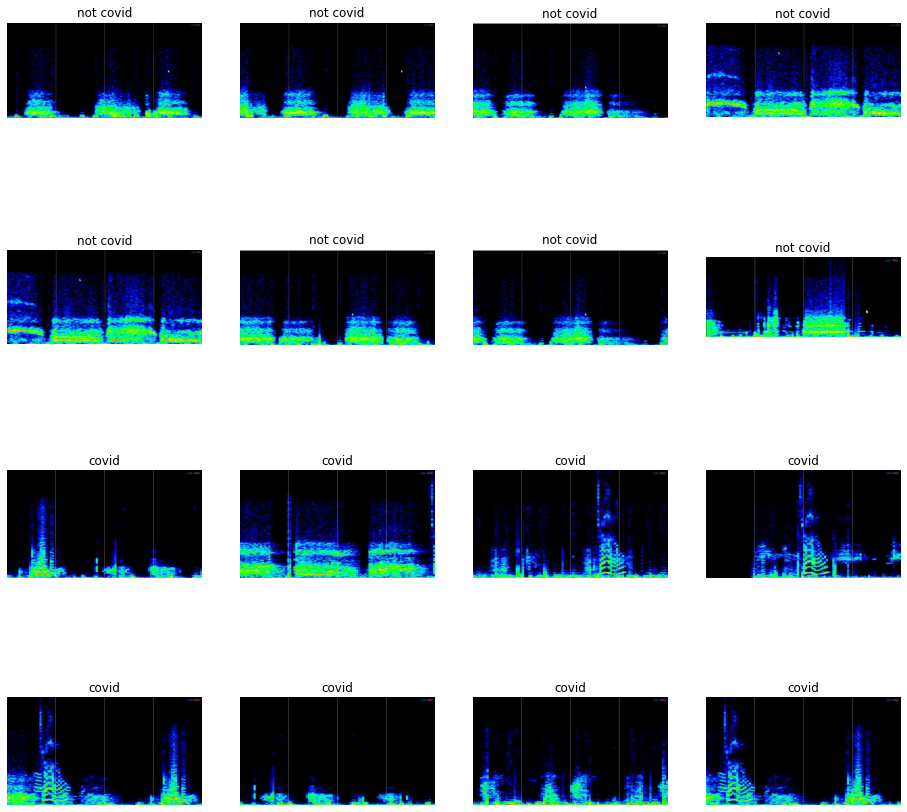

In [14]:
show_example_pics()

#### Data preprocessing (normalizing)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/tmp/train'
val_dir = '/tmp/val/'

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        classes = ['noncov', 'cov'],
        target_size=(200, 200), 
        batch_size=120,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        val_dir,
        classes = ['noncov', 'cov'],
        target_size=(200, 200),
        batch_size=19,
        class_mode='binary',
        shuffle=False)

Found 3879 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [16]:
from tensorflow.keras import layers, Model

def build_model(input_shape=(200, 200, 3)):
    input_img = layers.Input(shape=input_shape)

    first_conv = layers.Conv2D(16, (3, 3), activation='relu')(input_img)
    first_pool = layers.MaxPooling2D()(first_conv)
    
    second_conv = layers.Conv2D(32, (3, 3), activation='relu')(first_pool)
    second_pool = layers.MaxPooling2D()(second_conv)

    flatten = layers.Flatten()(second_pool)
    
    first_dense = layers.Dense(64, activation='relu')(flatten)
    # 0 no covid 1 yes covid
    output = layers.Dense(1, activation='sigmoid')(first_dense) 
    
    model = Model(input_img, output)
    model.summary()

    return model

In [19]:
model = build_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0   

In [21]:
from tensorflow.keras.optimizers import Adam, RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

In [22]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 [==============================] - 11s 909ms/step - loss: 1.5649 - accuracy: 0.7850 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 8s 988ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 8s 955ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 7s 934ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.1781e-04 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 8.4001e-04 - accuracy: 1.0000 - val_loss: 3.2649e-04 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 4.7604e-04 - accuracy: 1.0000 - val_loss: 1.0189e-04 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 8s 999ms/step - loss: 2.1264e-04 - accuracy: 1.0000 - val_loss: 7.0028e-05 - val_accuracy: 1.00

#### Evaluation

In [23]:
model.evaluate(validation_generator)

29/29 [==============================] - 3s 98ms/step - loss: 2.0167e-05 - accuracy: 1.0000


[2.016699181695003e-05, 1.0]

In [24]:
#@title `plot_history()` definition
from matplotlib import pyplot as plt

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, dpi=150)
  ax1.plot(history.history['loss'], label='training')
  ax1.plot(history.history['val_loss'], label='validation')
  ax1.set_ylabel('Cross-Entropy Loss')
  ax1.set_yscale('log')
  if history.history.__contains__('lr'):
    ax1b = ax1.twinx()
    ax1b.plot(history.history['lr'], 'g-', linewidth=1)
    ax1b.set_yscale('log')
    ax1b.set_ylabel('Learning Rate', color='g')

  ax2.plot(history.history['accuracy'], label='training')
  ax2.plot(history.history['val_accuracy'], label='validation')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.legend()
  plt.show()

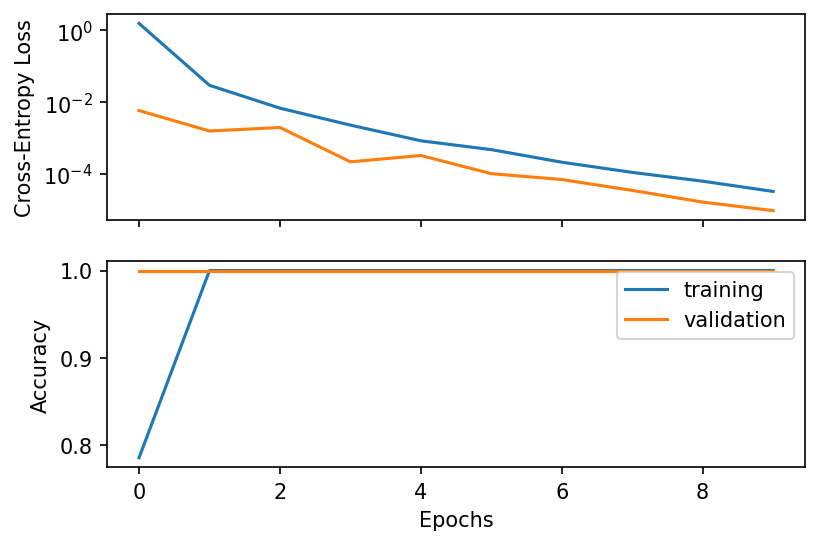

In [25]:
plot_history(history)

#### Predictions

Saving normal (2).jpg to normal (2).jpg
[[0.]]
[0.]
normal (2).jpg noncovid


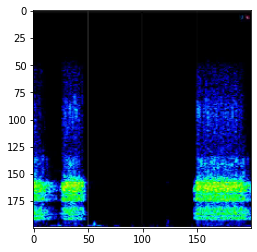

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " noncovid")
  else:
    print(fn + " covid")
 